In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [217]:
dataset=pd.read_csv('cars.csv',low_memory=False)
dataset.head(5)

# https://www.kaggle.com/abineshkumark/carsdata

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [218]:
dataset.shape

(261, 8)

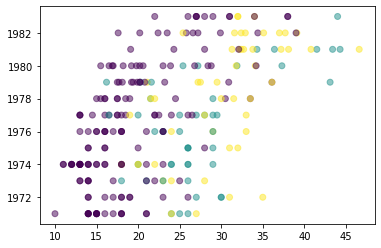

In [219]:
x=dataset.iloc[:,0].values ##cylinders
y=dataset.iloc[:,6].values #Year
x=x.reshape(len(x),1)
y_real=pd.factorize(dataset.iloc[:,7].values)
plt.scatter(x,y,c=y_real[0],alpha=0.5)
plt.show()

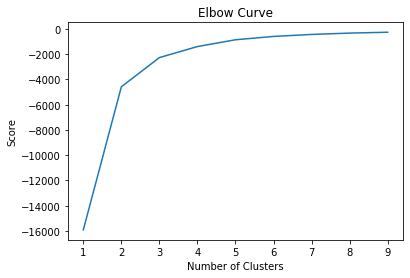

In [220]:
kmeans = [KMeans(n_clusters=i) for i in range(1, 10)]
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
plt.plot(range(1, 10),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [221]:
km=KMeans(n_clusters=3)
y_predicted = km.fit_predict(x,y)
dataset['cluster']=y_predicted
dataset.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,cluster
0,14.0,8,350,165,4209,12,1972,US.,2
1,31.9,4,89,71,1925,14,1980,Europe.,1
2,17.0,8,302,140,3449,11,1971,US.,2
3,15.0,8,400,150,3761,10,1971,US.,2
4,30.5,4,98,63,2051,17,1978,US.,1


In [222]:
accuracy=metrics.adjusted_rand_score(dataset.iloc[:,7].values,y_predicted)
print(f'Accuracy: {accuracy} \nIterations: {km.n_iter_}')

Accuracy: 0.26208313083983603 
Iterations: 4


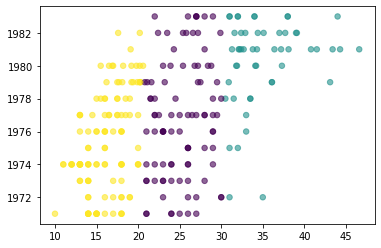

In [223]:
plt.scatter(x,y,c=y_predicted,s=30,alpha=0.6)
plt.show()

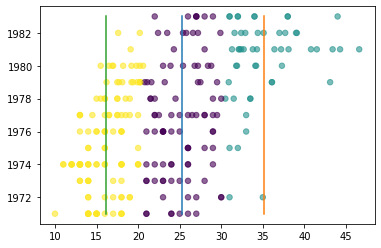

In [224]:
plt.scatter(x,y,c=y_predicted,s=30,alpha=0.6)
for i in range(km.cluster_centers_.size):
    plt.plot([km.cluster_centers_[i],km.cluster_centers_[i]],[dataset.iloc[:,6].min(),dataset.iloc[:,6].max()])
plt.show()

Text(0.5, 1.0, 'K-Means')

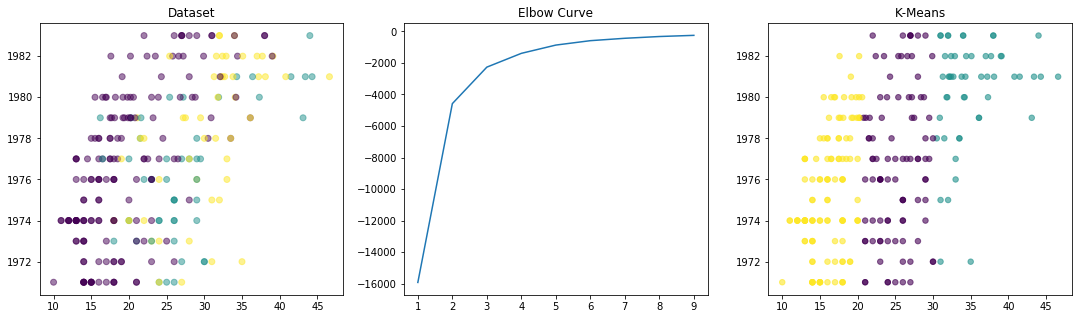

In [239]:
fig, axs = plt.subplots(1,3)
fig.set_size_inches(18.5, 5)

axs[0].scatter(x,y,c=y_real[0],alpha=0.5)
axs[0].set_title('Dataset')


kmeans = [KMeans(n_clusters=i) for i in range(1, 10)]
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
axs[1].plot(range(1, 10),score)
axs[1].set_title('Elbow Curve')

axs[2].scatter(x,y,c=y_predicted,s=30,alpha=0.6)
axs[2].set_title('K-Means')
